<a href="https://colab.research.google.com/github/Mochismo/LearnPython/blob/main/Seventeenth_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

1.   What to learn and what to predict
    * We learn variable segments which
      could be on building, space or
      location.
    * We are trying to predict the sale
      price of each property.
2.   What kind of file to create and
     submit
    * A CSV file containing the learning
      and training is created and
      submitted.
3.   What kind of index value will be
     used to evaluate submissions:
    * The errors between the expected
      values and the actual values will
      be used for evaluation.





In [71]:
# numpy and pandas for manipulation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# sklearn reprocessing for dealing with categorical variables 
from sklearn.preprocessing import LabelEncoder

# Suppress warnings 
import warnings 
warnings.filterwarnings('ignore') 
# matplolib and seaborn for plotting 
import matplotlib.pyplot as plt 
import seaborn as sns

In [72]:
train = pd.read_csv("/content/drive/MyDrive/application_train.csv")
test = pd.read_csv("/content/drive/MyDrive/application_test.csv")

print('Training data shape:', train.shape)
print('Testing data shape:', train.shape)

Training data shape: (307511, 122)
Testing data shape: (307511, 122)


In [73]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Cheking missing data and dropping columns with over 10% of missing data

In [74]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data

,Total,Percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


In [75]:
features = data[data.Percent < 0.1]
features

,Total,Percent
NAME_TYPE_SUITE,1292,0.004201
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.003320
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.003320
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.003320
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


In [76]:
features.index

Index(['NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'FLAG_OWN_CAR', 'FLAG_EMAIL', 'TARGET', 'FLAG_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
       'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE',
       'REGION_RATING_CLIENT', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE', 'CNT_CHILDREN', 'NAME_HOUSING_TYPE',
       'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FL

In [77]:
train = train[features.index]
train.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,FLAG_OWN_CAR,FLAG_EMAIL,TARGET,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,CNT_CHILDREN,NAME_HOUSING_TYPE,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START,SK_ID_CURR
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,406597.5,N,0,1,1,1,0,1,1,Cash loans,M,Y,202500.0,-2120,-3648.0,-637,-9461,0.018801,2,Single / not married,Secondary / secondary special,Working,0,House / apartment,0,2,WEDNESDAY,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,0,10,100002
1,Family,1.0,1.0,0.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,1293502.5,N,0,0,1,1,0,1,1,Cash loans,F,N,270000.0,-291,-1186.0,-1188,-16765,0.003541,1,Married,Higher education,State servant,0,House / apartment,0,1,MONDAY,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,School,0,0,0,0,0,11,100003
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,135000.0,Y,0,0,1,1,1,1,1,Revolving loans,M,Y,67500.0,-2531,-4260.0,-225,-19046,0.010032,2,Single / not married,Secondary / secondary special,Working,0,House / apartment,0,2,MONDAY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Government,0,0,0,0,0,9,100004
3,Unaccompanied,2.0,2.0,0.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,312682.5,N,0,0,0,1,0,1,1,Cash loans,F,Y,135000.0,-2437,-9833.0,-3039,-19005,0.008019,2,Civil marriage,Secondary / secondary special,Working,0,House / apartment,0,2,WEDNESDAY,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,0,17,100006
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,513000.0,N,0,0,0,1,0,1,1,Cash loans,M,Y,121500.0,-3458,-4311.0,-3038,-19932,0.028663,2,Single / not married,Secondary / secondary special,Working,0,House / apartment,0,2,THURSDAY,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Religion,1,1,0,0,0,11,100007


In [78]:
total_test = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending = False)
data_test = pd.concat([total_test, percent], axis=1, keys=['Total', 'Percent'])
data_test

,Total,Percent
COMMONAREA_MEDI,33495,0.687161
COMMONAREA_AVG,33495,0.687161
COMMONAREA_MODE,33495,0.687161
NONLIVINGAPARTMENTS_MODE,33347,0.684125
NONLIVINGAPARTMENTS_MEDI,33347,0.684125
...,...,...
REG_CITY_NOT_WORK_CITY,0,0.000000
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000


In [79]:
test_features = data_test[data_test.Percent < 0.1]
test_features.shape

(64, 2)

In [80]:
test = test[test_features.index]
test.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_ANNUITY,EXT_SOURCE_2,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMP_PHONE,DAYS_REGISTRATION,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,DAYS_ID_PUBLISH,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_GOODS_PRICE,AMT_CREDIT,AMT_INCOME_TOTAL,CNT_CHILDREN,FLAG_OWN_REALTY,FLAG_OWN_CAR,CODE_GENDER,NAME_CONTRACT_TYPE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR
0,Unaccompanied,0.0,0.0,0.0,0.0,20560.5,0.789654,1,0,1,-5170.0,1,0,1,2.0,-812,0.018850,-2329,-19241,2,House / apartment,Married,Higher education,Working,450000.0,568800.0,135000.0,0,Y,N,F,Cash loans,2,0,TUESDAY,18,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Kindergarten,0,0,0,0,0,100001
1,Unaccompanied,0.0,0.0,0.0,0.0,17370.0,0.291656,1,0,1,-9118.0,1,0,0,2.0,-1623,0.035792,-4469,-18064,2,House / apartment,Married,Secondary / secondary special,Working,180000.0,222768.0,99000.0,0,Y,N,M,Cash loans,2,0,FRIDAY,9,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Self-employed,0,0,0,0,0,100005
2,NaN,0.0,0.0,0.0,0.0,69777.0,0.699787,1,0,1,-2175.0,1,0,0,2.0,-3503,0.019101,-4458,-20038,2,House / apartment,Married,Higher education,Working,630000.0,663264.0,202500.0,0,Y,Y,M,Cash loans,2,0,MONDAY,14,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Transport: type 3,0,0,0,0,0,100013
3,Unaccompanied,0.0,0.0,0.0,0.0,49018.5,0.509677,1,0,1,-2000.0,1,1,0,4.0,-4208,0.026392,-1866,-13976,2,House / apartment,Married,Secondary / secondary special,Working,1575000.0,1575000.0,315000.0,2,Y,N,F,Cash loans,2,0,WEDNESDAY,11,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,0,100028
4,Unaccompanied,0.0,0.0,0.0,0.0,32067.0,0.425687,1,1,1,-4000.0,1,0,0,3.0,-4262,0.010032,-2191,-13040,2,House / apartment,Married,Secondary / secondary special,Working,625500.0,625500.0,180000.0,1,N,Y,M,Cash loans,2,0,FRIDAY,5,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Business Entity Type 3,1,1,0,0,0,100038


In [81]:
# Number of samples of each Label
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

0: loan repaid on time, 1:loan unpaid


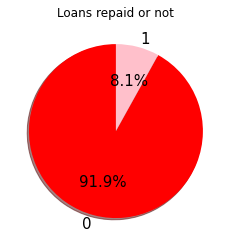

In [82]:
print("0: loan repaid on time, 1:loan unpaid")
plt.pie(train["TARGET"].value_counts(), labels=['0', '1'], autopct="%1.1f%%", shadow=True, startangle=90, colors= ['red', 'pink'], textprops={'fontsize': 15})
plt.title("Loans repaid or not")
plt.show()

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_TYPE_SUITE              306219 non-null  object 
 1   OBS_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 4   DEF_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 5   EXT_SOURCE_2                 306851 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   CNT_FAM_MEMBERS              307509 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE       307510 non-null  float64
 10  AMT_CREDIT                   307511 non-null  float64
 11  FLAG_OWN_CAR                 307511 non-null  object 
 12  FLAG_EMAIL                   307511 non-null  int64  
 13 

In [84]:
objects = train.select_dtypes(include=[object])
objects

,NAME_TYPE_SUITE,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Unaccompanied,N,Cash loans,M,Y,Single / not married,Secondary / secondary special,Working,House / apartment,WEDNESDAY,Business Entity Type 3
1,Family,N,Cash loans,F,N,Married,Higher education,State servant,House / apartment,MONDAY,School
2,Unaccompanied,Y,Revolving loans,M,Y,Single / not married,Secondary / secondary special,Working,House / apartment,MONDAY,Government
3,Unaccompanied,N,Cash loans,F,Y,Civil marriage,Secondary / secondary special,Working,House / apartment,WEDNESDAY,Business Entity Type 3
4,Unaccompanied,N,Cash loans,M,Y,Single / not married,Secondary / secondary special,Working,House / apartment,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...
307506,Unaccompanied,N,Cash loans,M,N,Separated,Secondary / secondary special,Working,With parents,THURSDAY,Services
307507,Unaccompanied,N,Cash loans,F,Y,Widow,Secondary / secondary special,Pensioner,House / apartment,MONDAY,XNA
307508,Unaccompanied,N,Cash loans,F,Y,Separated,Higher education,Working,House / apartment,THURSDAY,School
307509,Unaccompanied,N,Cash loans,F,Y,Married,Secondary / secondary special,Commercial associate,House / apartment,WEDNESDAY,Business Entity Type 1


In [85]:
objects.isna().sum()

NAME_TYPE_SUITE               1292
FLAG_OWN_CAR                     0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_REALTY                  0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
NAME_HOUSING_TYPE                0
WEEKDAY_APPR_PROCESS_START       0
ORGANIZATION_TYPE                0
dtype: int64

In [86]:
train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [87]:
train['NAME_TYPE_SUITE'].isna().sum()

1292

In [88]:
test['NAME_TYPE_SUITE'].isna().sum()

911

In [89]:
train['NAME_TYPE_SUITE'] = train['NAME_TYPE_SUITE'].fillna('Unaccompanied')
test['NAME_TYPE_SUITE'] = test['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [90]:
objects = train.select_dtypes(include= [object])
objects.isna().sum()

NAME_TYPE_SUITE               0
FLAG_OWN_CAR                  0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_REALTY               0
NAME_FAMILY_STATUS            0
NAME_EDUCATION_TYPE           0
NAME_INCOME_TYPE              0
NAME_HOUSING_TYPE             0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [91]:
# Create a Label encoder object 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [92]:
objects = train.dtypes[train.dtypes == "object"].index
objects

Index(['NAME_TYPE_SUITE', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [93]:
for i in objects:
  train[i] = le.fit_transform(train[i])
  test[i] = le.fit_transform(test[i])

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_TYPE_SUITE              307511 non-null  int64  
 1   OBS_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 4   DEF_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 5   EXT_SOURCE_2                 306851 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   CNT_FAM_MEMBERS              307509 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE       307510 non-null  float64
 10  AMT_CREDIT                   307511 non-null  float64
 11  FLAG_OWN_CAR                 307511 non-null  int64  
 12  FLAG_EMAIL                   307511 non-null  int64  
 13 

In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_TYPE_SUITE              48744 non-null  int64  
 1   OBS_30_CNT_SOCIAL_CIRCLE     48715 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE     48715 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE     48715 non-null  float64
 4   DEF_30_CNT_SOCIAL_CIRCLE     48715 non-null  float64
 5   AMT_ANNUITY                  48720 non-null  float64
 6   EXT_SOURCE_2                 48736 non-null  float64
 7   FLAG_MOBIL                   48744 non-null  int64  
 8   FLAG_WORK_PHONE              48744 non-null  int64  
 9   FLAG_EMP_PHONE               48744 non-null  int64  
 10  DAYS_REGISTRATION            48744 non-null  float64
 11  FLAG_CONT_MOBILE             48744 non-null  int64  
 12  FLAG_PHONE                   48744 non-null  int64  
 13  FLAG_EMAIL      

In [96]:
# Number of columns with missing values 
train.isnull().any(axis=0).sum()

9

In [97]:
# Number of rows with missing values
train.isnull().any(axis=1).sum()

1966

In [98]:
variables = train.columns 
columns = variables.drop('TARGET')
columns

Index(['NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'FLAG_OWN_CAR', 'FLAG_EMAIL', 'FLAG_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
       'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE',
       'REGION_RATING_CLIENT', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE', 'CNT_CHILDREN', 'NAME_HOUSING_TYPE',
       'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [99]:
# Replacing missing values (nan) by the mean in each column 
for c in columns:
  train[c] = train[c].fillna((train[c].mean()))
  test[c] = test[c].fillna((test[c].mean()))

In [100]:
# Number of columns with missing values
train.isnull().any(axis=0).sum()

0

In [101]:
# Number of columns with missing values
train.isnull().any(axis=1).sum()

0

In [102]:
train.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,FLAG_OWN_CAR,FLAG_EMAIL,TARGET,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,CNT_CHILDREN,NAME_HOUSING_TYPE,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START,SK_ID_CURR
0,6,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,406597.5,0,0,1,1,1,0,1,1,0,1,1,202500.0,-2120,-3648.0,-637,-9461,0.018801,2,3,4,7,0,1,0,2,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,10,100002
1,1,1.0,1.0,0.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,1293502.5,0,0,0,1,1,0,1,1,0,0,0,270000.0,-291,-1186.0,-1188,-16765,0.003541,1,1,1,4,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,0,0,11,100003
2,6,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,135000.0,1,0,0,1,1,1,1,1,1,1,1,67500.0,-2531,-4260.0,-225,-19046,0.010032,2,3,4,7,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,9,100004
3,6,2.0,2.0,0.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,312682.5,0,0,0,0,1,0,1,1,0,0,1,135000.0,-2437,-9833.0,-3039,-19005,0.008019,2,0,4,7,0,1,0,2,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,17,100006
4,6,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,513000.0,0,0,0,0,1,0,1,1,0,1,1,121500.0,-3458,-4311.0,-3038,-19932,0.028663,2,3,4,7,0,1,0,2,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,37,1,1,0,0,0,11,100007


Learning

In [103]:
X = train.drop(['TARGET'], axis = 1)
y = train['TARGET']

In [104]:
X.shape, y.shape

((307511, 64), (307511,))

In [105]:
X.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,FLAG_OWN_CAR,FLAG_EMAIL,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,CNT_CHILDREN,NAME_HOUSING_TYPE,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START,SK_ID_CURR
0,6,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,406597.5,0,0,1,1,0,1,1,0,1,1,202500.0,-2120,-3648.0,-637,-9461,0.018801,2,3,4,7,0,1,0,2,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,10,100002
1,1,1.0,1.0,0.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,1293502.5,0,0,1,1,0,1,1,0,0,0,270000.0,-291,-1186.0,-1188,-16765,0.003541,1,1,1,4,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,0,0,11,100003
2,6,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,135000.0,1,0,1,1,1,1,1,1,1,1,67500.0,-2531,-4260.0,-225,-19046,0.010032,2,3,4,7,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,9,100004
3,6,2.0,2.0,0.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,312682.5,0,0,0,1,0,1,1,0,0,1,135000.0,-2437,-9833.0,-3039,-19005,0.008019,2,0,4,7,0,1,0,2,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,17,100006
4,6,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,513000.0,0,0,0,1,0,1,1,0,1,1,121500.0,-3458,-4311.0,-3038,-19932,0.028663,2,3,4,7,0,1,0,2,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,37,1,1,0,0,0,11,100007


Splitting and Standardizing data

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Learning and estimation

In [107]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_preds_dt = dt.predict(X_test)

In [108]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
y_preds_log = log.predict(X_test)

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_preds_rf = rf.predict(X_test)

Evaluation

In [110]:
roc_auc_score(y_test, y_preds_dt)

0.5261273974031804

In [111]:
roc_auc_score(y_test, y_preds_log)

0.5003414778051906

In [112]:
roc_auc_score(y_test, y_preds_rf)

0.5000598098382667

[Problem 3] Estimation on test data

In [113]:
print('Training data shape:', train.shape)
print('Testing data shape:', test.shape)

Training data shape: (307511, 65)
Testing data shape: (48744, 64)


Predicting with Decision Tree

In [114]:
y_preds_dt2 = dt.predict(test)

In [115]:
test['TARGET'] = y_preds_dt2

In [116]:
test.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_ANNUITY,EXT_SOURCE_2,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMP_PHONE,DAYS_REGISTRATION,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,DAYS_ID_PUBLISH,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_GOODS_PRICE,AMT_CREDIT,AMT_INCOME_TOTAL,CNT_CHILDREN,FLAG_OWN_REALTY,FLAG_OWN_CAR,CODE_GENDER,NAME_CONTRACT_TYPE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET
0,6,0.0,0.0,0.0,0.0,20560.5,0.789654,1,0,1,-5170.0,1,0,1,2.0,-812,0.018850,-2329,-19241,2,1,1,1,6,450000.0,568800.0,135000.0,0,1,0,0,0,2,0,5,18,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0,100001,0
1,6,0.0,0.0,0.0,0.0,17370.0,0.291656,1,0,1,-9118.0,1,0,0,2.0,-1623,0.035792,-4469,-18064,2,1,1,4,6,180000.0,222768.0,99000.0,0,1,0,1,0,2,0,0,9,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,0,0,100005,0
2,6,0.0,0.0,0.0,0.0,69777.0,0.699787,1,0,1,-2175.0,1,0,0,2.0,-3503,0.019101,-4458,-20038,2,1,1,1,6,630000.0,663264.0,202500.0,0,1,1,1,0,2,0,1,14,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,54,0,0,0,0,0,100013,0
3,6,0.0,0.0,0.0,0.0,49018.5,0.509677,1,0,1,-2000.0,1,1,0,4.0,-4208,0.026392,-1866,-13976,2,1,1,4,6,1575000.0,1575000.0,315000.0,2,1,0,0,0,2,0,6,11,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,100028,0
4,6,0.0,0.0,0.0,0.0,32067.0,0.425687,1,1,1,-4000.0,1,0,0,3.0,-4262,0.010032,-2191,-13040,2,1,1,4,6,625500.0,625500.0,180000.0,1,0,1,1,0,2,0,0,5,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,1,0,0,0,100038,0


In [117]:
submission_1 = test.loc[:,('SK_ID_CURR', 'TARGET')]

In [118]:
submission_1

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0


In [119]:
submission_1.to_csv("submission_1.csv", index=False)

[Problem 4] Feature engineering

Checking feature importances

In [120]:
imp_features = pd.DataFrame({'Feature': dt.feature_importances_}, index=X.columns).sort_values(by = 'Feature', ascending= False)

In [121]:
imp_features.head(10)

,Feature
EXT_SOURCE_2,0.098762
DAYS_BIRTH,0.069444
SK_ID_CURR,0.067590
DAYS_REGISTRATION,0.067412
DAYS_ID_PUBLISH,0.066953
DAYS_EMPLOYED,0.057913
AMT_ANNUITY,0.057142
DAYS_LAST_PHONE_CHANGE,0.056093
REGION_POPULATION_RELATIVE,0.047888
AMT_INCOME_TOTAL,0.045395


In [122]:
important = imp_features.head(10).index
important

Index(['EXT_SOURCE_2', 'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'AMT_ANNUITY',
       'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE',
       'AMT_INCOME_TOTAL'],
      dtype='object')

In [123]:
X1 = train[important]
X2 = train[important[0:1]]
X3 = train[important[0:4]]
X4 = train[important[0:6]]
X5 = train[important[0:8]]
X6 = train[important[2:3]]
X7 = train[important[3:4]]
X8 = train[important[4:5]]
X9 = train[important[5:6]]

Defining a function to determine the index value for each feature used:

In [124]:
def feature(X, feature):
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  dt = tree.DecisionTreeClassifier()
  dt.fit(X_train, y_train)
  y_preds = dt.predict(X_test)

  roc_auc_score(y_test, y_preds)
  print(f'ROC score for {feature} is {roc_auc_score(y_test, y_preds)}')

In [125]:
feature(X1, 'the top 10 features')

ROC score for the top 10 features is 0.5199531282229972


In [126]:
feature(X2, 'EXIT_SOURCE_2')

ROC score for EXIT_SOURCE_2 is 0.5163050709242611


In [127]:
feature(X3, 'the top 3 features')

ROC score for the top 3 features is 0.5167739036150697


In [128]:
feature(X4, 'the top 5 features')

ROC score for the top 5 features is 0.5166570744704808


In [129]:
feature(X5, 'the top 7 features')

ROC score for the top 7 features is 0.52181585314542


In [130]:
feature(X6, 'DAYS_REGISTRATION')

ROC score for DAYS_REGISTRATION is 0.5004613860008398


In [131]:
feature(X7, 'DAYS_ID_PUBLISH')

ROC score for DAYS_ID_PUBLISH is 0.49993838493234205


In [132]:
feature(X8, 'DAYS_BIRTH')

ROC score for DAYS_BIRTH is 0.4999113616621461


In [133]:
feature(X9, 'DAYS_EMPLOYED')

ROC score for DAYS_EMPLOYED is 0.49988113961235947


Making an estimate for the test data of the most accurate feature

In [134]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size= 0.25)

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
XF1_test = scaler.fit_transform(X1_test)

In [135]:
dt = tree.DecisionTreeClassifier()
dt.fit(X1_train, y_train)

DecisionTreeClassifier()

In [136]:
test1 = test[important]

In [137]:
y_preds = dt.predict(test1)

In [138]:
test['TARGET'] = y_preds

In [139]:
submission_2 = test.loc[:, ('SK_ID_CURR', 'TARGET')]

In [140]:
submission_2.to_csv("submission_2.csv", index=False)